<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/8)_A)_ON_Sentiment_Analysis_of_Topics_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import essential packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime

import collections
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams


# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_COVID19_TWEETS_TOPICS.csv')
tweets_df = data.iloc[: , 1:] 
tweets_df.drop_duplicates('Text', inplace = True)
tweets_df[:3]

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_3
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...,-0.8360,8.200,negative,1,1
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...,-0.4767,26.165,negative,2,2
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...,-0.3818,30.910,negative,1,1


In [ ]:
tweets_df['Topic'] = tweets_df['Topic'].astype(str)

##Preping datasets and visualizations

In [ ]:
# Changing the tweet sentiment dataset datetime field to datetime object
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime']) # converting to datetime
tweets_df['Datetime'] = tweets_df['Datetime'].dt.date # converting to just Year-Month-Day format 
tweets_df.Datetime.head(1), tweets_df.Datetime.tail(1)

(0    2021-05-31
 Name: Datetime, dtype: object, 335760    2020-03-01
 Name: Datetime, dtype: object)

In [ ]:
# Cutting up the dataset into Topics
filter1_topics = tweets_df['Topic'] == '0'
Topic_1 = tweets_df[filter1_topics]

filter2_topics = tweets_df['Topic'] == '1'
Topic_2 = tweets_df[filter2_topics]

filter3_topics = tweets_df['Topic'] == '2'
Topic_3 = tweets_df[filter3_topics]

filter4_topics = tweets_df['Topic'] == '3'
Topic_4 = tweets_df[filter4_topics]

In [ ]:
# Getting daily sentiments for topics 
group_topic1 = Topic_1['Sentiment_Score_Norm'].groupby(Topic_1['Datetime'])
sent_avgs_topic1 = group_topic1.mean()

group_topic2 = Topic_2['Sentiment_Score_Norm'].groupby(Topic_2['Datetime'])
sent_avgs_topic2 = group_topic2.mean()

group_topic3 = Topic_3['Sentiment_Score_Norm'].groupby(Topic_3['Datetime'])
sent_avgs_topic3 = group_topic3.mean()

group_topic4 = Topic_4['Sentiment_Score_Norm'].groupby(Topic_4['Datetime'])
sent_avgs_topic4 = group_topic4.mean()

In [ ]:
grouped = tweets_df['Sentiment_Score_Norm'].groupby(tweets_df['Datetime'])
compound_sentiment_daily_avgs = grouped.mean()

In [ ]:
ontario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_Ontario.csv')

ontario['Date'] = pd.to_datetime(ontario['Date']) # converting to datetime
ontario['Date'] = ontario['Date'].dt.date # converting to just Year-Month-Day format 
ontario.Date.head(1), ontario.Date.tail(1)
date = ontario['Date'].unique() 

In [ ]:
# Creating visual lines for the sentiment scores that will demonstrate the neutral zone
neutral_line = []
for i in range(457):
  neutral_line.append(50)

neutral_range_t = []
for i in range(457):
  neutral_range_t.append(52.5)

neutral_range_b = []
for i in range(457):
  neutral_range_b.append(47.5)

In [ ]:
# Importing covid-19 case and mortality data over time 
case = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/cases_timeseries_prov.csv')
mortalities = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/mortality_timeseries_prov.csv')

# filtering data to province and dates desired
filter1 = case['province'] == 'Ontario'
ontario_cases = case[filter1]
ontario_cases = ontario_cases[36:493]

filter2 = mortalities['province'] == 'Ontario'
ontario_mortalities = mortalities[filter2]
ontario_mortalities = ontario_mortalities[:450]

ontario_cases['date_report'] = pd.to_datetime(ontario_cases['date_report']) # converting to datetime
ontario_cases['date_report'] = ontario_cases['date_report'].dt.date # converting to just Year-Month-Day format 
print(ontario_cases['date_report'].head(1), ontario_cases['date_report'].tail(1))

ontario_mortalities['date_death_report'] = pd.to_datetime(ontario_mortalities['date_death_report']) # converting to datetime
ontario_mortalities['date_death_report'] = ontario_mortalities['date_death_report'].dt.date # converting to just Year-Month-Day format 
print(ontario_mortalities['date_death_report'].head(1), ontario_mortalities['date_death_report'].tail(1))

4772    2020-01-03
Name: date_report, dtype: object 5228    2021-05-31
Name: date_report, dtype: object
4392    2020-08-03
Name: date_death_report, dtype: object 4841    2021-05-31
Name: date_death_report, dtype: object


In [ ]:
# Setting X and Y Values for Each Daily Sentiment - Topics
x_t1 = sent_avgs_topic1.index
y_t1 = sent_avgs_topic1

x_t2 = sent_avgs_topic2.index
y_t2 = sent_avgs_topic2

x_t3 = sent_avgs_topic3.index
y_t3 = sent_avgs_topic3

x_t4 = sent_avgs_topic4.index
y_t4 = sent_avgs_topic4

In [ ]:
# Changing the index dates to ints so I can plot a trend line using polyfit
def reform_dates(dex):
  Datetime_Float = []
  day_str = []
  days = []
  for d in dex:
    day_str.append(str(d))
  for s in day_str:
    days.append(re.sub('[-]','', s))
  for r in days:
    Datetime_Float.append(int(r))
  return Datetime_Float

#Topics and Stringency Index 

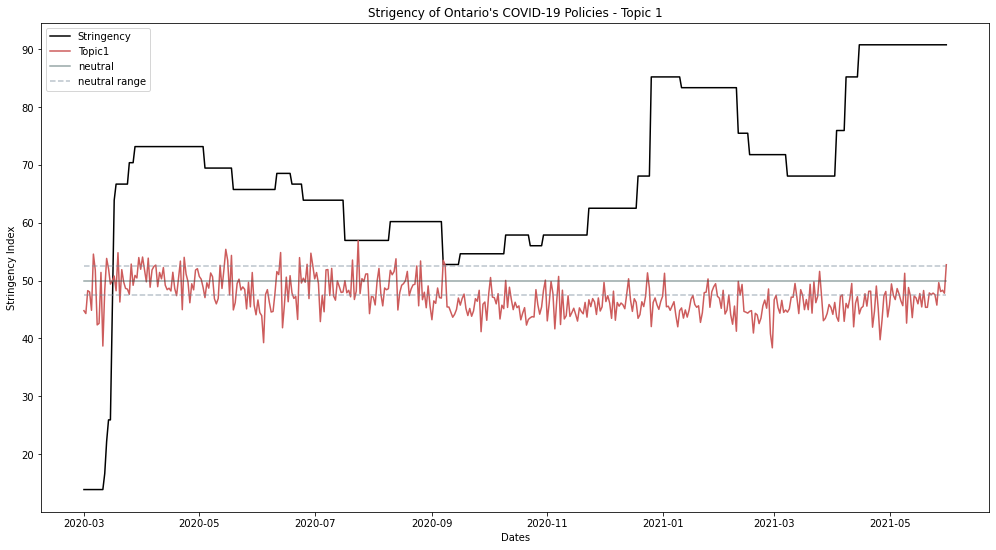

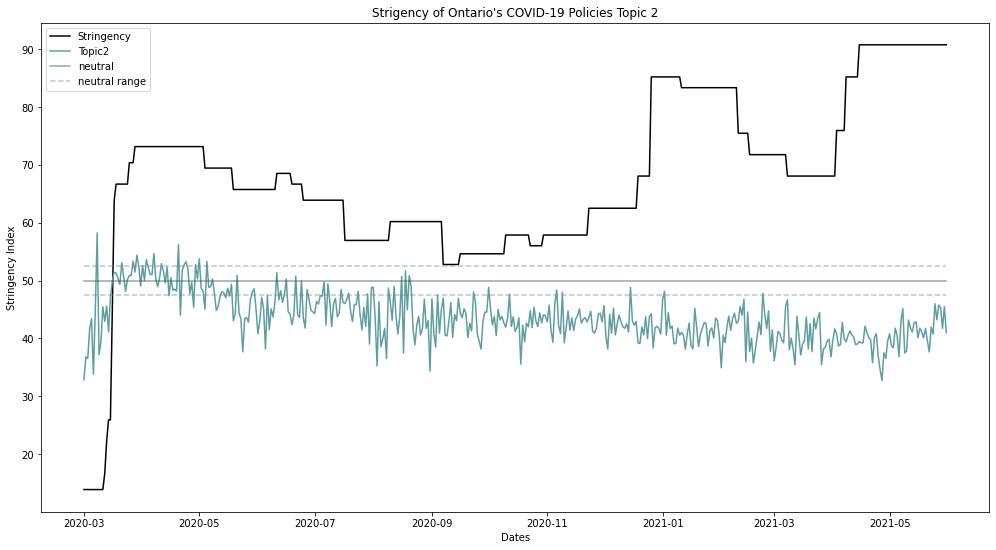

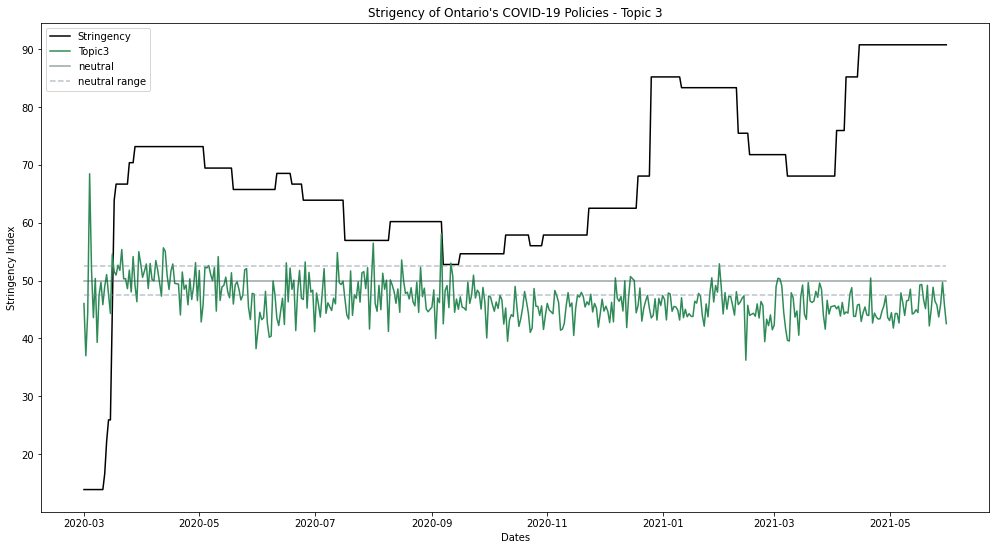

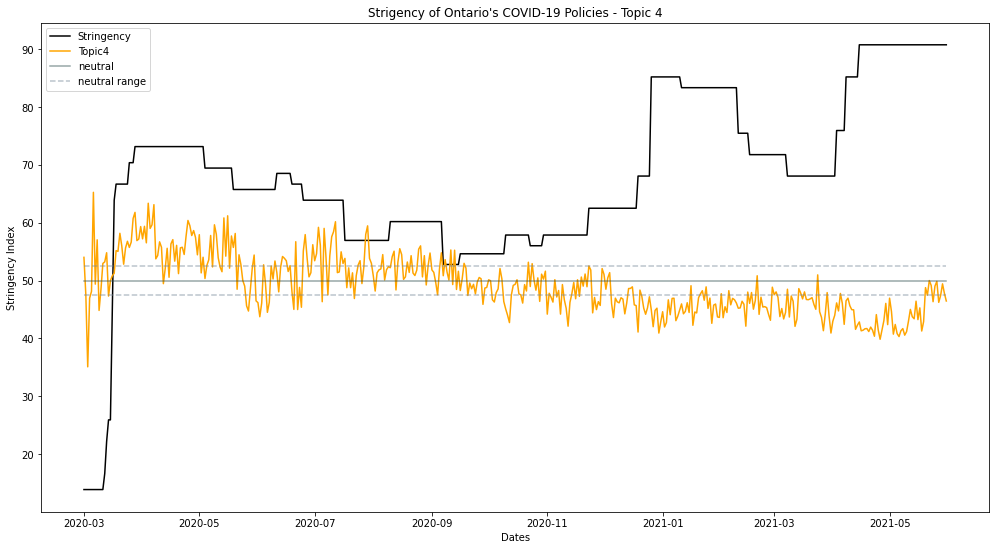

In [ ]:
date = ontario['Date'].unique() 

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies - Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies - Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies - Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


#Topics and Containment-Health

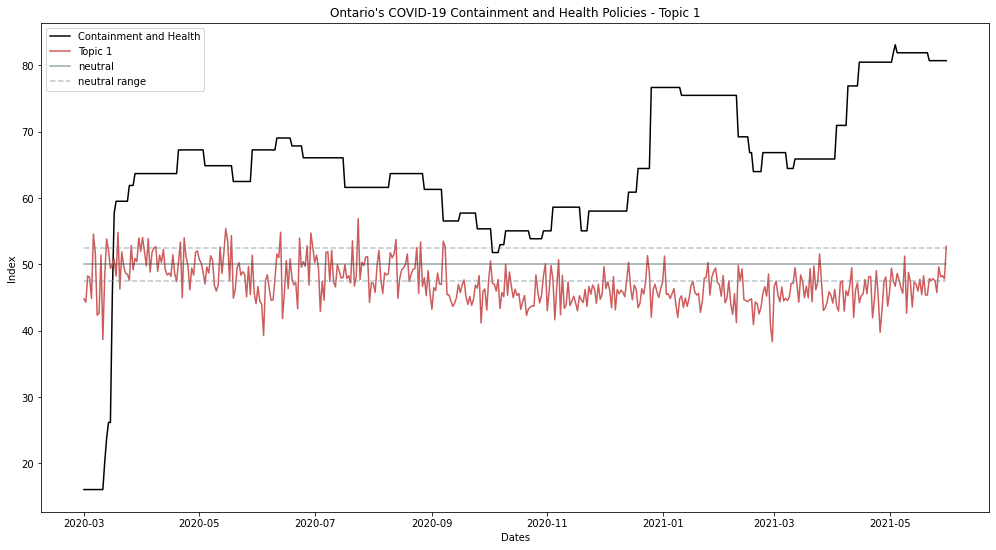

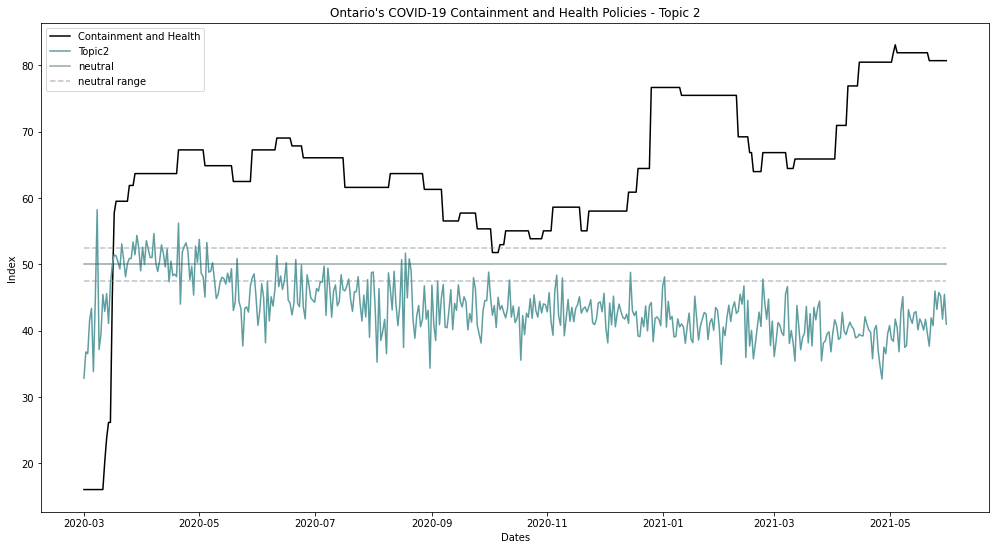

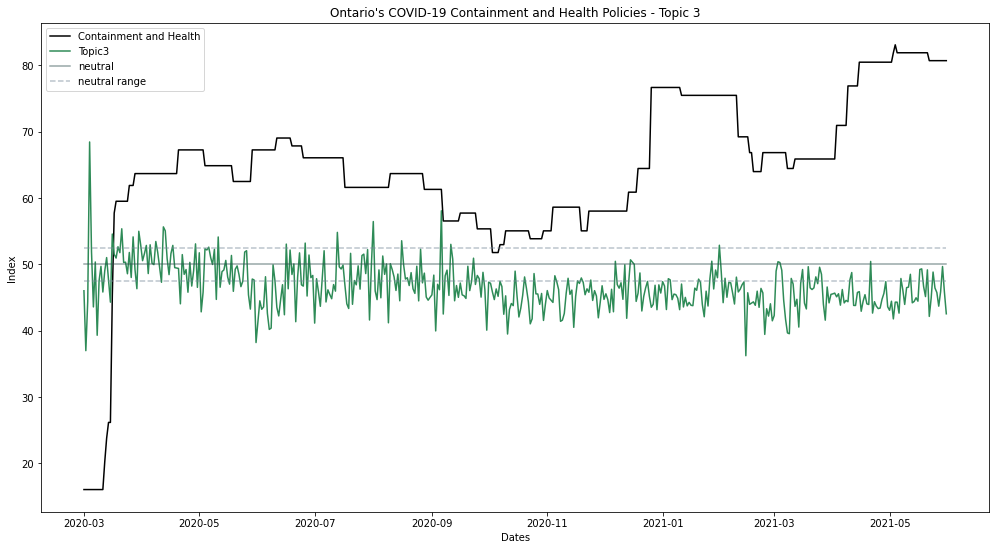

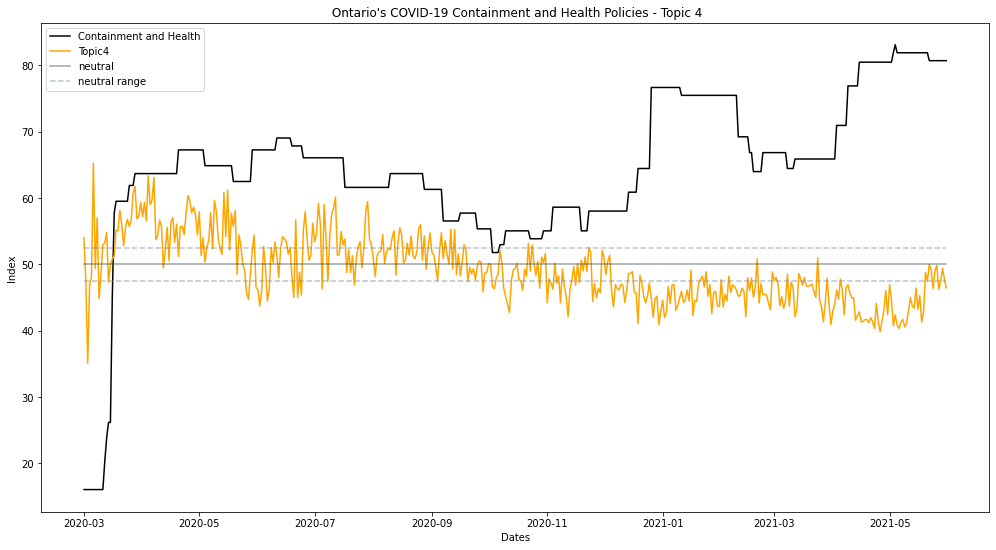

In [ ]:

date = ontario['Date'].unique() 

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'black', label = 'Containment and Health')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Containment and Health Policies - Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'black', label = 'Containment and Health')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Containment and Health Policies - Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'black', label = 'Containment and Health')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Containment and Health Policies - Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'black', label = 'Containment and Health')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title(" Ontario's COVID-19 Containment and Health Policies - Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


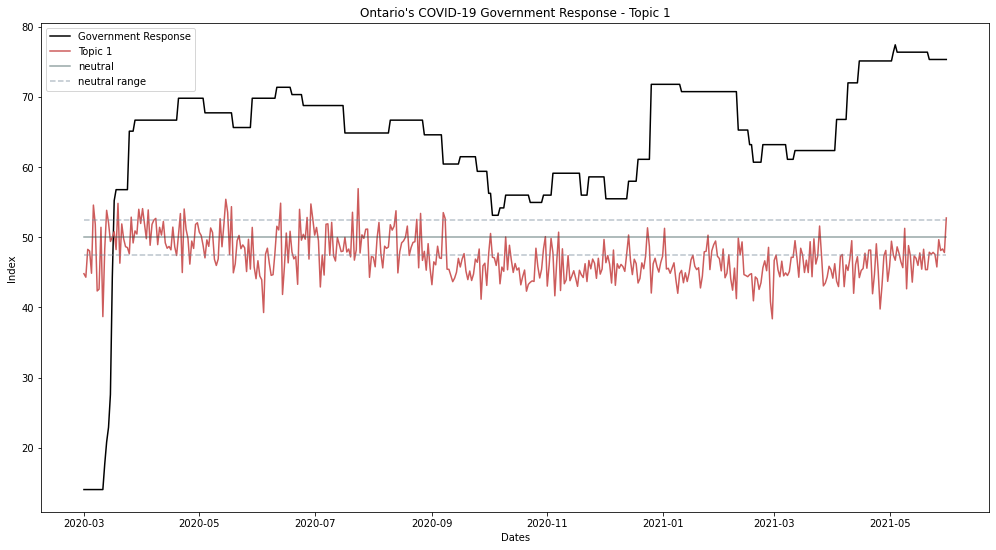

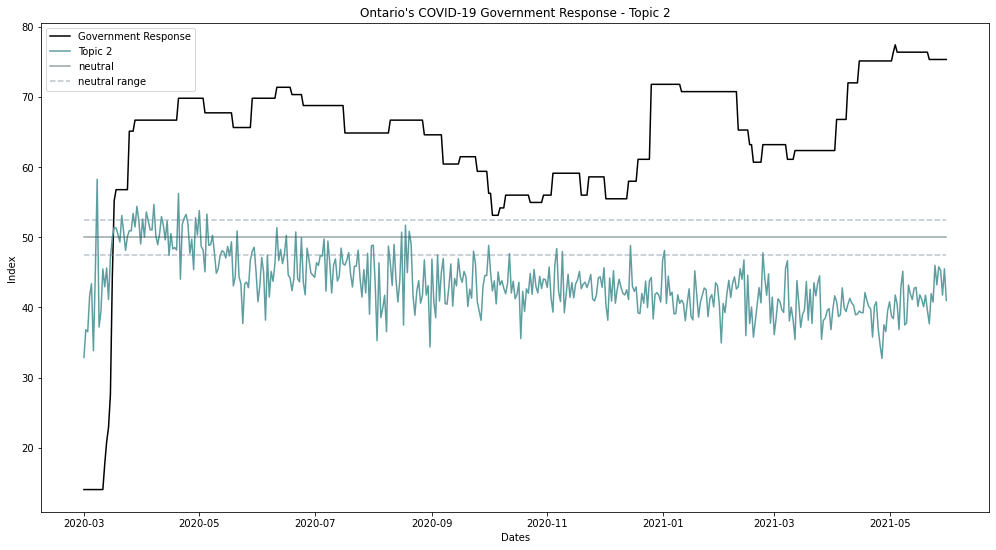

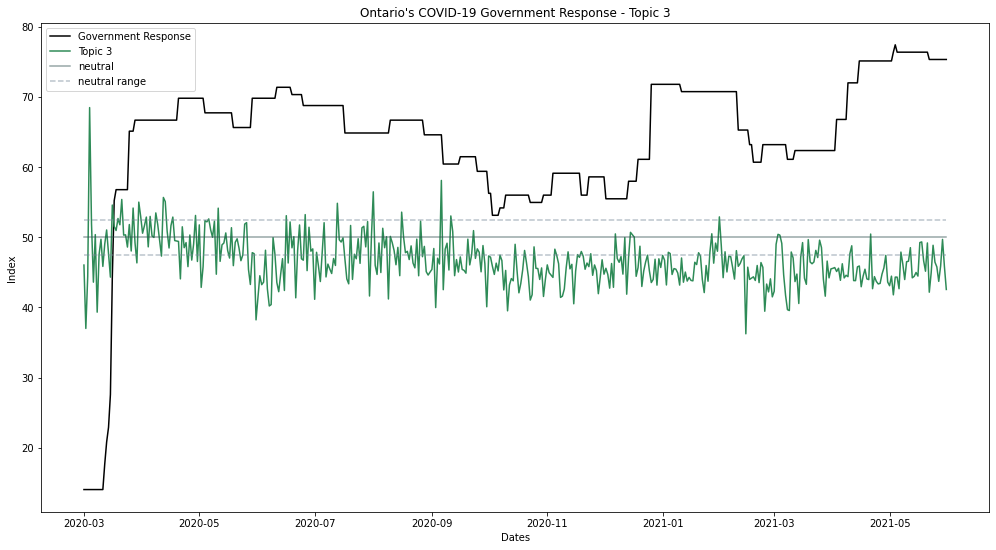

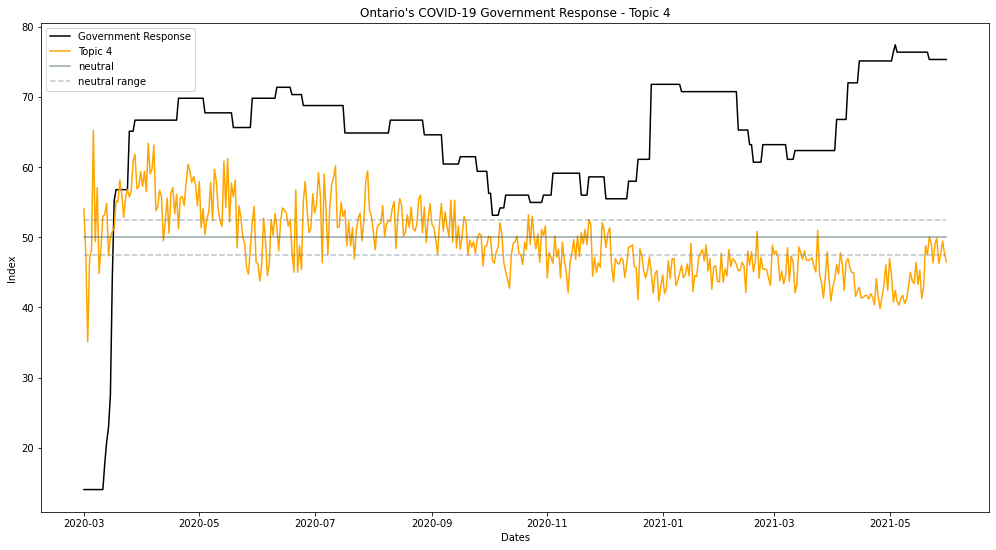

In [ ]:
date = ontario['Date'].unique() 

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Government Response - Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Government Response - Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Government Response - Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Government Response - Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

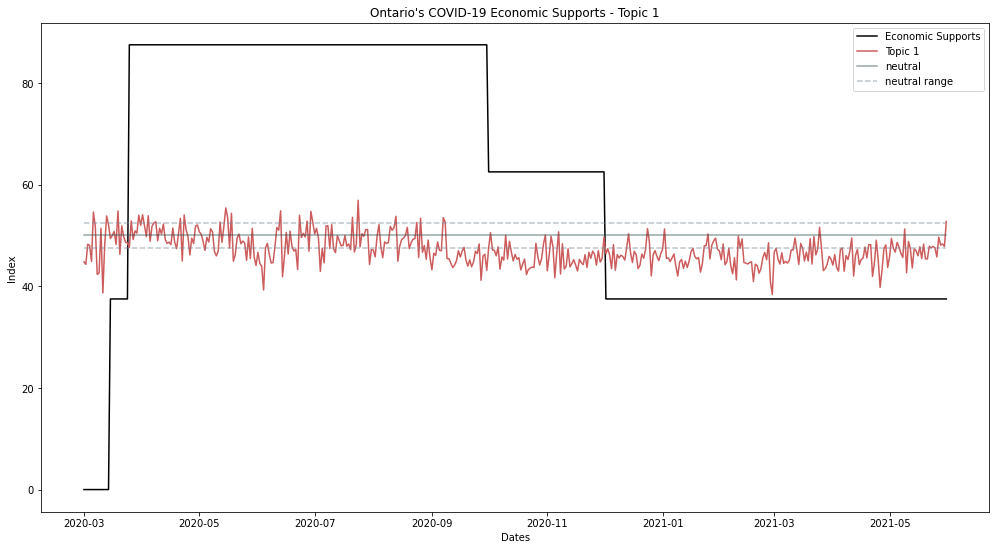

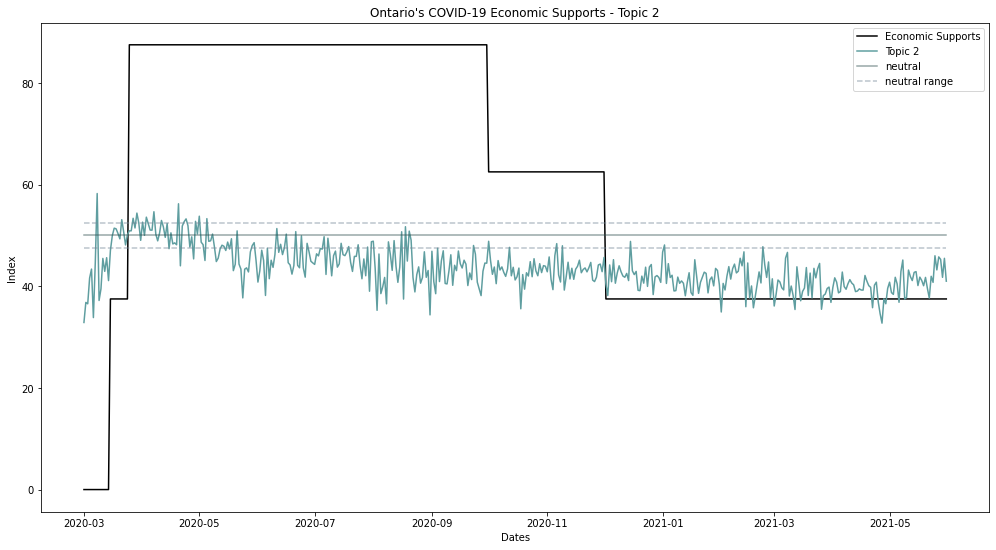

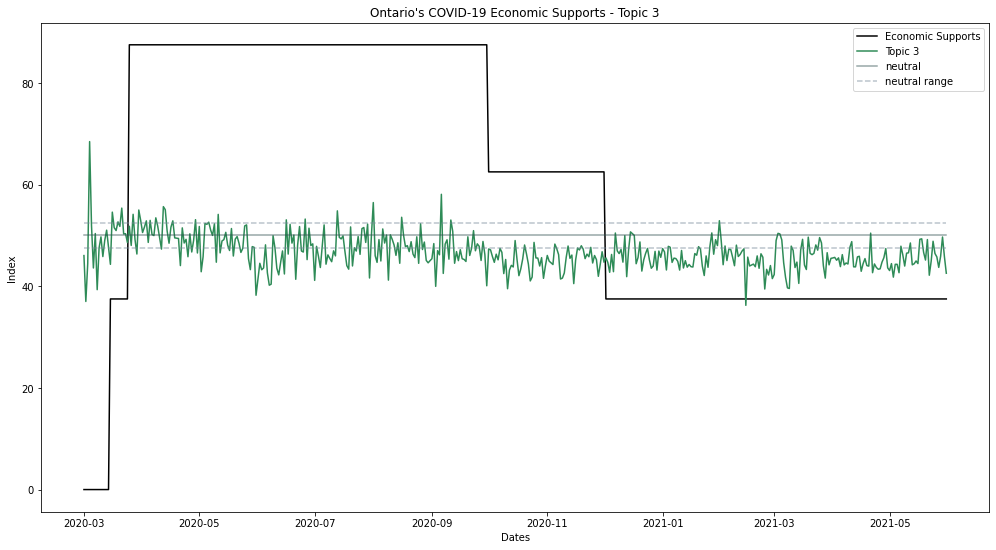

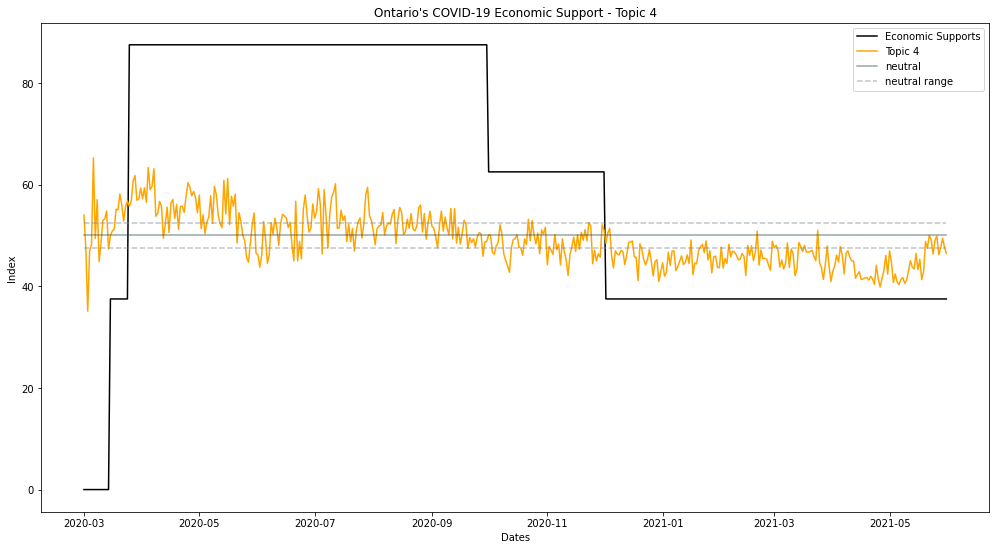

In [ ]:
date = ontario['Date'].unique() 

economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'black', label = 'Economic Supports')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Economic Supports - Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'black', label = 'Economic Supports')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Economic Supports - Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'black', label = 'Economic Supports')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Economic Supports - Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'black', label = 'Economic Supports')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Index")
plt.title("Ontario's COVID-19 Economic Support - Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


# Average Sentiment for Each Topic

In [ ]:
topics_fil = tweets_df['Sentiment_Score'].groupby(tweets_df['Topic'])
average_sent_perTopic = topics_fil.mean()

print('AVG SENTIMENT OF EACH TOPIC - ON:', '\n', average_sent_perTopic)

AVG SENTIMENT OF EACH TOPIC - ON: 
 Topic
0   -0.066774
1   -0.137976
2   -0.069982
3   -0.043915
Name: Sentiment_Score, dtype: float64


In [ ]:
import random
print('TOPIC 1 TEXTS')
random.sample(list(Topic_1['Text_Unprocessed']), 25)

TOPIC 1 TEXTS


['remember last week when  shed crocodile tears about the effect this pandemic has had on the people in this province yeah. ',
 ' no, you did not....which expert told you to say were going on a lock down as soon as youre finished your christmas shopping....seriously. enough. stop talking and let the adults handle the pandemic.',
 '      so is it true your new covid shield app wont work if bluetooth is off we keep bluetooth turned off to conserve battery power so i guess we wont bother using the app.',
 '   when present = covid',
 ' when we do the nasal swab on children for covid , we have the parent restrain their heads,  hands and feet to avoid the child struggling and striking out at the tester. the sound is deafening as they scream. the trauma lasts a lifetime. they will never forgive you.   ',
 'omg! that guy in the black shirt that yanks the other guy out of his seat should be charged with assault!  will you be following up on this citizens who might be unable to wear a mask shoul

In [ ]:
print('TOPIC 2 TEXTS')
random.sample(list(Topic_2['Text_Unprocessed']), 25)

TOPIC 2 TEXTS


[' stop spreading fear over this virus!!! . recovery and you want to make people afraid to leave their homes majority of deaths in ltc so that is where the efforts should be concentrated. too many patients in one room. all focus should be on protecting our elderly. thats it',
 '    when are you and city councillors going to march through the streets of toronto to support the thousands of businesses effected by this lowrisk virus',
 ' you were a clown before covid, now youre a clown thats responsible for countless needless death, thats much worse.',
 ' 🇨🇦 👥 this is a pandemic and a crisis, good to see some companies and businesses taking important steps and measures, to protect all people. workersshould have to go to work scared.   only essential businesses should be open.',
 ' fact. only  people under the age of  have died from or with covid in ontario since jan. , . ( govt website) population . million. youve destroyed x times lives over this no end game no virus = no power.',
 'it am

In [ ]:
print('TOPIC 3 TEXTS')
random.sample(list(Topic_3['Text_Unprocessed']), 25)

TOPIC 3 TEXTS


['    of the world population suffer from famine. many more cannot get proper food and water. do you think we will eradicate a virus when we cant even supply everyone with food and water do you think canada can live without any outside contact from other countries seriously',
 ' why dont we get a push for testing health markers so we can get people healthier and drop all mortality rates including for covid',
 '  an archive i made that supports your claim.canadian news articles depicting overcapacity and influenza strain preceding covid+ news articles+ municipalities across canadacovid isnt overwhelming our healthcare system. the government is.',
 '   theyve already done that, under the cover of covid.',
 ' its a global pandemic but masks are deemed nonessential 🤷🏼\u200d♀️ ',
 ' you are causing the difficult time not the virus',
 ' can there be a limit or stop to retail store managers and district managers who are travelling store to store like theres not a communicable virus',
 '    al

In [ ]:
print('TOPIC 4 TEXTS')
random.sample(list(Topic_4['Text_Unprocessed']), 25)

TOPIC 4 TEXTS


['wow, this  government has zero moral authority anymore— yet another example    ',
 'the politicization of the pandemic as ontarioversusottawa is a particularly weak move by  and his inept conservatives. and so, the trudeau government throws the travel ban back into fords lap, exposing the fraud he is  the star ',
 'basically, the auditor generals report maps out, in great detail, what most of us have always suspected about  and his governments response to covid: theyre sleazy, slow and incompetent.   ',
 ' the facts are starting to emerge. ‘no evidence of increased covid cases linked to trinity bellwoods, toronto public health says  ',
 'the perspective has shifted. people on both sides of the aisle understand how badly ,  and the rest of the pc cronies have bungled this pandemic yet ford is still playing politics. dunningkruger is a powerful thing. theyve gaslit themselves. ',
 '                         is the new  for  in . it currently sits at a   cases per , population!',
 '    t

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topic1_list = Topic_1['Text'].tolist()
common_words = get_top_n_trigram(topic1_list, 15)

df_topic1 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic1['trigram'], y=df_topic1['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Topic 1"))
fig.show()

In [ ]:
topic2_list = Topic_2['Text'].tolist()
common_words = get_top_n_trigram(topic2_list, 15)

df_topic2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic2['trigram'], y=df_topic2['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Topic 2"))
fig.show()

In [ ]:
topic3_list = Topic_3['Text'].tolist()
common_words = get_top_n_trigram(topic3_list, 15)

df_topic3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic3['trigram'], y=df_topic3['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Topic 3"))
fig.show()

In [ ]:
topic4_list = Topic_4['Text'].tolist()
common_words = get_top_n_trigram(topic4_list, 15)

df_topic4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic4['trigram'], y=df_topic4['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Topic 3"))
fig.show()

In [ ]:
print('Topic 1 Max score:', max(Topic_1['Sentiment_Score']), '    ', 'Topic 1 Avg score:', Topic_1['Sentiment_Score'].mean(), '    ', 'Topic 1 Min score:', min(Topic_1['Sentiment_Score']))
print('Topic 2 Max score:', max(Topic_2['Sentiment_Score']), '    ', 'Topic 2 Avg score:', Topic_2['Sentiment_Score'].mean(), '    ', 'Topic 2 Min score:', min(Topic_2['Sentiment_Score']))
print('Topic 3 Max score:', max(Topic_3['Sentiment_Score']), '    ', 'Topic 3 Avg score:', Topic_3['Sentiment_Score'].mean(), '    ', 'Topic 3 Min score:', min(Topic_3['Sentiment_Score']))
print('Topic 4 Max score:', max(Topic_4['Sentiment_Score']), '    ', 'Topic 4 Avg score:', Topic_4['Sentiment_Score'].mean(), '    ', 'Topic 4 Min score:', min(Topic_4['Sentiment_Score']))

Topic 1 Max score: 0.9964      Topic 1 Avg score: -0.06677429916922185      Topic 1 Min score: -0.9984
Topic 2 Max score: 0.9996      Topic 2 Avg score: -0.1379755005017559      Topic 2 Min score: -0.9912
Topic 3 Max score: 0.9990000000000001      Topic 3 Avg score: -0.06998231807289702      Topic 3 Min score: -0.9956
Topic 4 Max score: 0.9995      Topic 4 Avg score: -0.043915307890620106      Topic 4 Min score: -0.9931


In [ ]:
# Look at the highest and  lowest days
tweet_list = tweets_df['Sentiment_Score'].tolist()
highest_sents_df = tweets_df.nlargest(114, 'Sentiment_Score')
highest_sents_df

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_3
30348,2021-04-21,woman heart attack say die covid nonsense 🤣 🤣 ...,"woman had heart attack, but saying died ...",0.9996,99.980,positive,1,1
43445,2021-04-14,mean licence plate correctlyand expect manage ...,i mean couldnt get licence plates to be done ...,0.9995,99.975,positive,3,2
300710,2021-04-14,mean licence plate correctly expect manage pan...,i mean couldnt get licence plates to be done ...,0.9995,99.975,positive,3,2
9193,2021-05-16,yes covid come email 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣...,yes covid came via emails. 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.9990,99.950,positive,2,0
271346,2020-04-07,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 ...,🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 now this is ...,0.9986,99.930,positive,2,0
...,...,...,...,...,...,...,...,...
285273,2020-03-19,initially fan strength support compassion chan...,i have to say that initially i was not a fan ...,0.9759,98.795,positive,3,2
41606,2021-04-16,thoroughly enjoy parent we ve creative child c...,"she thoroughly enjoys it 💗 as parents,...",0.9758,98.790,positive,2,1
245986,2020-05-24,🥰 🤗 premier ford extremely grateful high estee...,"🙌🥰🤗 premier ford, i am extremely grateful, wi...",0.9758,98.790,positive,3,1
3288,2021-05-26,kid okay think need opportunity stuff chest pr...,"our kids are doing okay. just, sometimes,...",0.9757,98.785,positive,0,0


##Negative Tweets

In [ ]:
neg_filt = tweets_df['Sentiment'] == 'negative'
neg_tweets_df = tweets_df[neg_filt]
neg_tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_NEG_COVID19_TWEETS.csv')